# 主成分分析によるデータの可視化
この記事では、主成分分析（PCA）を用いて、栄養データを2次元にプロットし、データ同士の関係を見るということを行います。  
主成分分析の詳しい内容については、[こちら](https://github.com/KentaItakura/blog-post-about-PCA)のページを見ていただけると幸いです。


コードについては、以下のページを参考に作成されていただきました。  
# 参考ページ  
主成分分析を Python で理解する  
https://qiita.com/maskot1977/items/082557fcda78c4cdb41f  
【python】pythonで主成分分析のバイプロット  
https://www.haya-programming.com/entry/2018/03/28/231305

# 解析に用いるデータ  
文部科学省により、公表されている、日本食品標準成分表をもとにデータ分析を行っていきます。ここでは、食品の成分が記載されていますが、今回はフルーツを対象として行いたいと思います。また、フルーツも筆者のほうで、スーパーによく売られていると思われるものを選定しました。このデータは、dataというフォルダの中に格納されています。  
https://www.mext.go.jp/a_menu/syokuhinseibun/1365420.htm  

![myImg]('./img/data.PNG')

## モジュールのインポート

In [1]:
# 数値計算やデータフレーム操作に関するライブラリをインポートする
import numpy as np
import pandas as pd
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlibにて、日本語のテキストを表示するためにロードする
from matplotlib.font_manager import FontProperties
fp = FontProperties(fname=r'C:\WINDOWS\Fonts\meiryob.ttc', size=16) 
#機械学習のライブラリのロード
import sklearn # scipyのバージョンのせいで、エラーが出る場合がある。
from sklearn.decomposition import PCA #主成分分析に用いる

## データのロード  
栄養成分表を読み込み、一部を表示してみます。

In [2]:
data=pd.read_csv('./data/fruits_nutrition_components.csv', encoding="shift-jis")
data.head(12)

,fruit_name,エネルギー（kcal）,炭水化物,食物繊維総量,ナトリウム,カリウム,カルシウム,鉄,ビタミンB1,ビタミンB2,ナイアシン,ビタミンB6,ビタミンB12,ビタミンC
0,いちご,34,8.5,1.4,0,170,17,0.3,0.03,0.02,0.4,0.04,0,62
1,うめ,28,7.9,2.5,2,240,12,0.6,0.03,0.05,0.4,0.06,0,6
2,かき,60,15.9,1.6,1,170,9,0.2,0.03,0.02,0.3,0.06,0,70
3,オレンジ,46,11.8,1.0,1,180,24,0.2,0.07,0.04,0.3,0.06,0,60
4,グレープフルーツ,38,9.6,0.6,1,140,15,0.0,0.07,0.03,0.3,0.04,0,36
5,シークヮーサー,25,7.9,0.3,2,180,17,0.1,0.08,0.03,0.3,0.03,0,11
6,すだち,20,6.6,0.1,1,140,16,0.2,0.03,0.02,0.2,0.08,0,40
7,ゆず,21,7.0,0.4,1,210,20,0.1,0.05,0.02,0.2,0.02,0,40
8,レモン,54,12.5,4.9,4,130,67,0.2,0.07,0.07,0.2,0.08,0,100
9,キウイフルーツ,53,13.5,2.5,2,290,33,0.3,0.01,0.02,0.3,0.12,0,69


## 各種前準備

### 年代＋性別のラベルを作成する

In [3]:
groupName=data['fruit_name']
print(groupName)

0           いちご
1            うめ
2           かき　
3          オレンジ
4      グレープフルーツ
5       シークヮーサー
6           すだち
7           ゆず　
8           レモン
9       キウイフルーツ
10        さくらんぼ
11          すいか
12          なし　
13    パインアップル　　
14         バナナ　
15         ぶどう　
16       マンゴー　　
17          メロン
18           もも
19          りんご
Name: fruit_name, dtype: object


### 解析の対象とする範囲を設定する

In [4]:
# energy以降のすべての要素を対象とする場合
# df_allVariants = data.iloc[:, 7::] 

# energyから、xx番目までの列を対象とする場合
df_allVariants = data.iloc[:, 1::]

# 選んだ対象を確認する
df_allVariants.head(10)

,エネルギー（kcal）,炭水化物,食物繊維総量,ナトリウム,カリウム,カルシウム,鉄,ビタミンB1,ビタミンB2,ナイアシン,ビタミンB6,ビタミンB12,ビタミンC
0,34,8.5,1.4,0,170,17,0.3,0.03,0.02,0.4,0.04,0,62
1,28,7.9,2.5,2,240,12,0.6,0.03,0.05,0.4,0.06,0,6
2,60,15.9,1.6,1,170,9,0.2,0.03,0.02,0.3,0.06,0,70
3,46,11.8,1.0,1,180,24,0.2,0.07,0.04,0.3,0.06,0,60
4,38,9.6,0.6,1,140,15,0.0,0.07,0.03,0.3,0.04,0,36
5,25,7.9,0.3,2,180,17,0.1,0.08,0.03,0.3,0.03,0,11
6,20,6.6,0.1,1,140,16,0.2,0.03,0.02,0.2,0.08,0,40
7,21,7.0,0.4,1,210,20,0.1,0.05,0.02,0.2,0.02,0,40
8,54,12.5,4.9,4,130,67,0.2,0.07,0.07,0.2,0.08,0,100
9,53,13.5,2.5,2,290,33,0.3,0.01,0.02,0.3,0.12,0,69


### 行列の標準化  
今回は、各列の平均を引いて、さらに標準偏差で割っている。各列を平均0、標準偏差1に正規化している

In [5]:
df_allVariants_norm = df_allVariants.apply(lambda x: (x-x.mean())/(x.std()+0.001), axis=0)
# 標準偏差で割らない場合
# df_allVariants_norm = df_allVariants.apply(lambda x: (x-x.mean()), axis=0)
df_allVariants_norm.head(5)

,エネルギー（kcal）,炭水化物,食物繊維総量,ナトリウム,カリウム,カルシウム,鉄,ビタミンB1,ビタミンB2,ナイアシン,ビタミンB6,ビタミンB12,ビタミンC
0,-0.722073,-0.890972,0.124537,-0.893118,-0.268161,0.141014,0.791322,-0.518407,-0.339529,0.314162,-0.436554,0.0,1.108630
1,-1.086143,-1.039881,1.139283,0.480909,0.719801,-0.202922,3.052240,-0.518407,1.227528,0.314162,-0.187095,0.0,-0.890832
2,0.855565,0.945572,0.309036,-0.206104,-0.268161,-0.409283,0.037682,-0.518407,-0.339529,-0.169164,-0.187095,0.0,1.394268
3,0.006068,-0.071973,-0.244462,-0.206104,-0.127024,0.622523,0.037682,1.209617,0.705176,-0.169164,-0.187095,0.0,1.037221
4,-0.479359,-0.617972,-0.613460,-0.206104,-0.691573,0.003439,-1.469597,1.209617,0.182823,-0.169164,-0.436554,0.0,0.180309


## 主成分分析の実行

### `pca`関数を用いて、主成分分析を実行する

In [6]:
pca = PCA()
pca.fit(df_allVariants_norm)
# データを主成分空間に写像 => このあと、各サンプルのPC1, PC2の値を取り出す
feature = pca.transform(df_allVariants_norm)

### 主成分得点の確認

In [7]:
if  len(df_allVariants_norm.index) > len(df_allVariants_norm.columns):
    pca_score = pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(df_allVariants_norm.columns))]).head(20)
else:
    pca_score = pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(df_allVariants_norm.index))]).head(12)

pca_score.head(20)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-0.413146,0.831362,0.302289,1.128322,0.295276,1.165584,0.742952,0.594195,0.288372,-0.106767,-0.271257,0.058647,0.0
1,1.114221,0.602803,2.081503,2.376017,1.930517,-0.911752,-0.303433,-0.019756,0.283224,-0.125616,0.195860,-0.025170,0.0
2,0.423574,-0.220667,-1.226438,0.510864,-0.824960,0.478242,0.123163,1.099400,-0.271187,-0.286384,0.323394,-0.100231,0.0
3,0.540595,1.077256,-0.325137,-0.929404,0.593520,0.575537,-0.006937,0.625805,-0.162266,0.288532,-0.048815,0.055313,0.0
4,-1.145537,0.866172,-0.153379,-1.744160,0.131178,0.144617,0.401468,0.025123,0.124831,0.078650,0.219585,0.136924,0.0
5,-1.226190,1.027840,1.203615,-1.717473,0.699237,-0.302702,-0.367047,-0.239997,0.192988,0.217565,-0.102121,-0.122839,0.0
6,-1.681546,0.965142,0.822045,0.329810,0.393075,1.069684,0.184557,-0.526718,-0.788888,-0.372333,-0.080380,-0.073810,0.0
7,-1.540774,1.265636,0.895326,-0.494399,0.009436,0.967562,-0.245174,-0.290454,0.111401,0.601323,0.174337,-0.086078,0.0
8,3.955876,4.693172,-1.600692,-0.342187,-0.606839,-0.720863,0.079739,-0.521732,0.066264,-0.244131,-0.007932,0.021757,0.0
9,1.960692,0.396909,-0.079490,1.676005,-1.353120,1.021621,-0.569986,-0.327635,0.008484,0.348279,-0.085945,-0.003468,0.0


### PC1とPC2の2軸で、各サンプルを可視化する

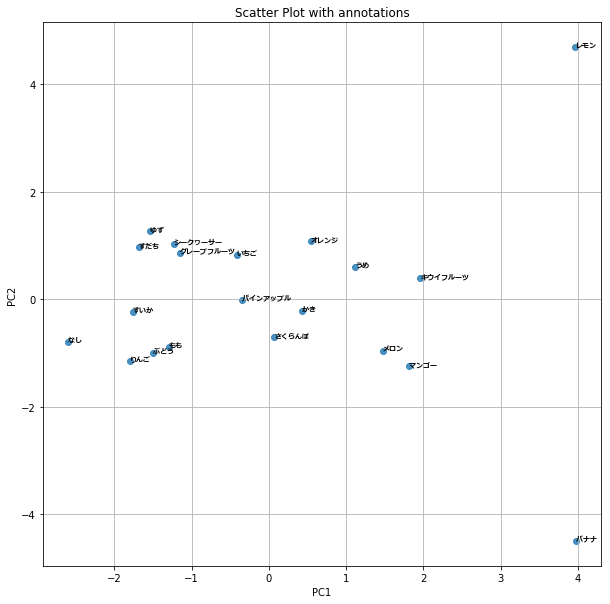

In [8]:
# 系列名の取得
annotations=list(groupName)
# プロット
plt.figure(figsize=(10,10))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Scatter Plot with annotations",fontsize=12)
# 系列名を表示させる
for i, label in enumerate(annotations):
    plt.annotate(label, (feature[i, 0], feature[i, 1]), fontproperties=fp,fontsize=7)

plt.show()

### 第一主成分と第二主成分における観測変数の寄与度をプロットする

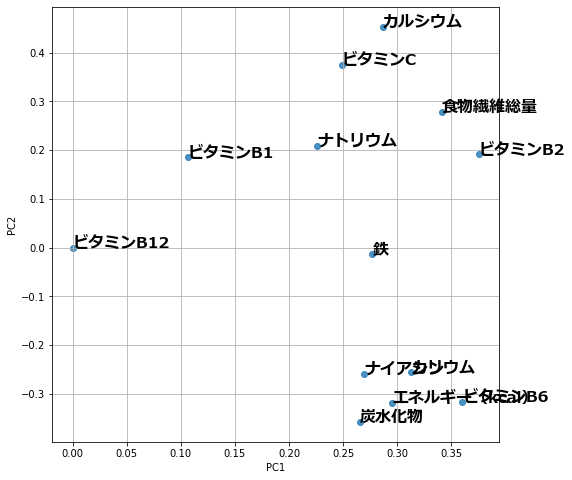

In [9]:
# PCA の固有ベクトル
pd.DataFrame(pca.components_, columns=df_allVariants_norm.columns, index=["PC{}".format(x + 1) for x in range(len(df_allVariants_norm.columns))])
plt.figure(figsize=(8, 8))
for x, y, name in zip(pca.components_[0], pca.components_[1], df_allVariants_norm.columns):
    plt.text(x, y, name, fontproperties=fp)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()

### 主成分スコアを表示する

In [10]:
df_allVariants_norm
#print(range(len(df_allVariants_norm.columns)))
#pd.DataFrame(pca.components_)

,エネルギー（kcal）,炭水化物,食物繊維総量,ナトリウム,カリウム,カルシウム,鉄,ビタミンB1,ビタミンB2,ナイアシン,ビタミンB6,ビタミンB12,ビタミンC
0,-0.722073,-0.890972,0.124537,-0.893118,-0.268161,0.141014,0.791322,-0.518407,-0.339529,0.314162,-0.436554,0.0,1.108630
1,-1.086143,-1.039881,1.139283,0.480909,0.719801,-0.202922,3.052240,-0.518407,1.227528,0.314162,-0.187095,0.0,-0.890832
2,0.855565,0.945572,0.309036,-0.206104,-0.268161,-0.409283,0.037682,-0.518407,-0.339529,-0.169164,-0.187095,0.0,1.394268
3,0.006068,-0.071973,-0.244462,-0.206104,-0.127024,0.622523,0.037682,1.209617,0.705176,-0.169164,-0.187095,0.0,1.037221
4,-0.479359,-0.617972,-0.613460,-0.206104,-0.691573,0.003439,-1.469597,1.209617,0.182823,-0.169164,-0.436554,0.0,0.180309
5,-1.268178,-1.039881,-0.890209,0.480909,-0.127024,0.141014,-0.715958,1.641623,0.182823,-0.169164,-0.561284,0.0,-0.712308
6,-1.571570,-1.362517,-1.074709,-0.206104,-0.691573,0.072226,0.037682,-0.518407,-0.339529,-0.652490,0.062365,0.0,0.323127
7,-1.510892,-1.263244,-0.797960,-0.206104,0.296388,0.347375,-0.715958,0.345605,-0.339529,-0.652490,-0.686013,0.0,0.323127
8,0.491495,0.101754,3.353275,1.854937,-0.832710,3.580367,0.037682,1.209617,2.272233,-0.652490,0.062365,0.0,2.465408
9,0.430817,0.349936,1.139283,0.480909,1.425487,1.241607,0.791322,-1.382419,-0.339529,-0.169164,0.561284,0.0,1.358563


### PCA の固有ベクトルを表示する

In [11]:
pd.DataFrame(pca.components_, columns=df_allVariants_norm.columns[0:],index=["PC{}".format(x + 1) for x in range(len(df_allVariants_norm.columns))])

,エネルギー（kcal）,炭水化物,食物繊維総量,ナトリウム,カリウム,カルシウム,鉄,ビタミンB1,ビタミンB2,ナイアシン,ビタミンB6,ビタミンB12,ビタミンC
PC1,0.295724,0.265667,0.341477,0.226035,0.313344,0.286984,0.277031,0.106470,0.375381,0.269747,0.360504,0.0,0.249009
PC2,-0.318896,-0.357788,0.278226,0.208628,-0.255927,0.453123,-0.013008,0.184951,0.191234,-0.258532,-0.316593,0.0,0.374863
PC3,-0.425990,-0.426861,-0.230363,0.424266,0.399550,-0.134681,0.211671,-0.003797,0.018289,0.402938,-0.013869,-0.0,-0.133303
PC4,-0.052916,-0.064392,0.326374,-0.141338,0.030989,-0.029795,0.562568,-0.705397,-0.117486,-0.129262,-0.141768,0.0,0.005728
PC5,-0.169340,-0.109258,-0.106924,-0.457031,-0.159003,-0.092814,0.505590,0.383413,0.442009,-0.116410,0.134345,-0.0,-0.274922
PC6,-0.193978,-0.150008,-0.272143,-0.441218,0.273743,0.097851,0.000438,-0.018142,-0.248157,-0.066307,0.376161,0.0,0.615484
PC7,-0.074793,-0.110827,0.039313,-0.300726,-0.381595,-0.007230,-0.256748,-0.299930,0.328494,0.679532,-0.026147,-0.0,0.135062
PC8,0.220408,0.168343,-0.147681,0.014608,-0.044166,-0.383273,0.326308,0.262938,-0.077168,0.199166,-0.554369,0.0,0.472915
PC9,-0.081438,-0.133553,0.646971,-0.347836,0.274301,-0.069776,-0.116087,0.349625,-0.349488,0.236813,-0.131047,-0.0,-0.157325
PC10,0.057934,0.117787,-0.238214,-0.297294,0.532942,0.374667,-0.155394,-0.122965,0.298872,-0.037979,-0.512963,0.0,-0.141678


# 累積寄与率の計算

In [12]:
# 寄与率の取り出し
contributionRate = pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(df_allVariants_norm.columns))])
contributionRate.head(20)

,0
PC1,0.302961
PC2,0.249739
PC3,0.152131
PC4,0.099574
PC5,0.067487
PC6,0.047492
PC7,0.035176
PC8,0.018188
PC9,0.014572
PC10,0.010202


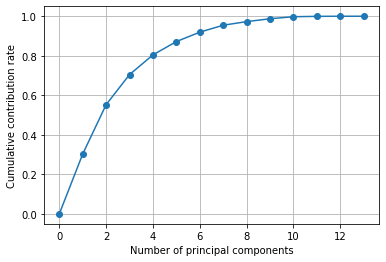

In [13]:
# 累積寄与率の可視化
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

# バイプロットを行い、ローディングもあわせて可視化する  

## バイプロットの関数の定義  

このセクションのコードは[こちらのURL](https://www.haya-programming.com/entry/2018/03/28/231305  )にある記事を参考に作成いたしました。  
- テキストどうしが重なりあって、うまく見えない場合があったので、`adjustText`を利用して、見やすくしました。  
https://github.com/Phlya/adjustText  
- 日本語のこちらの記事も参考になりました。  
https://upura.hatenablog.com/entry/2018/07/05/181500

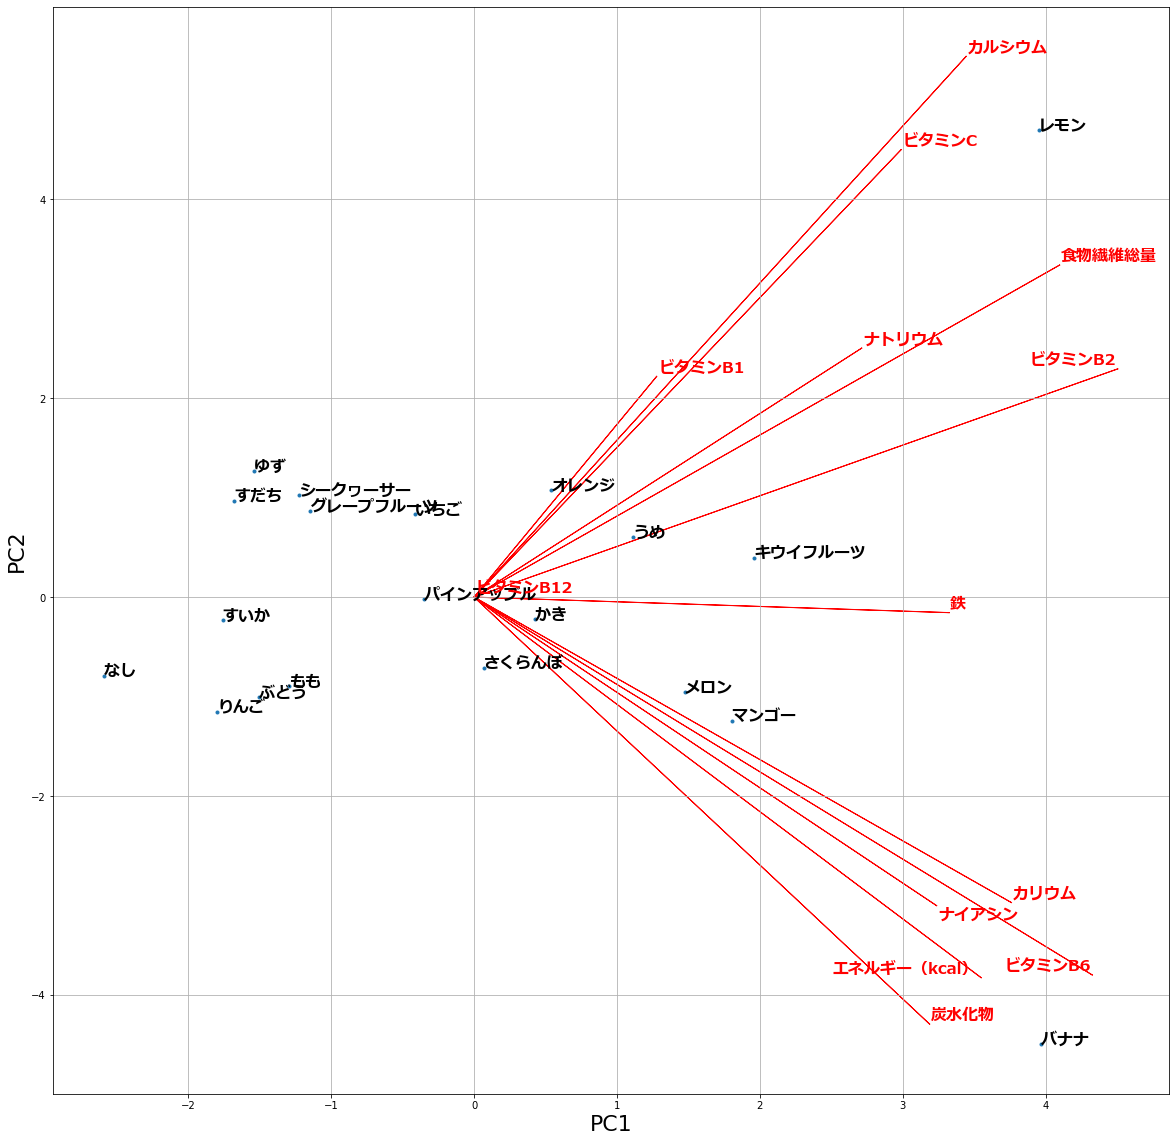

In [14]:
from adjustText import adjust_text
arrow_mul=12
text_mul=1

x_data = feature[:,0]
y_data = feature[:,1]

pc0 = pca.components_[0]
pc1 = pca.components_[1]

plt.figure(figsize=(20, 20))
plt.scatter(x_data, y_data,
            marker=".")
# 系列名を表示させる
for i, label in enumerate(annotations):
    plt.annotate(label, (feature[i, 0], feature[i, 1]), fontproperties=fp)
    
for i in range(pc0.shape[0]):
    plt.arrow(0, 0, 
              pc0[i]*arrow_mul, pc1[i]*arrow_mul,
              color='r')

texts = [plt.text(pc0[i]*arrow_mul*text_mul, 
                  pc1[i]*arrow_mul*text_mul, 
                  list(df_allVariants.columns)[i], 
                  ha='center', va='center',
                  color='r', fontproperties=fp) for i in range(pc0.shape[0])]
adjust_text(texts)
plt.grid()
plt.xlabel("PC1",fontsize=22)
plt.ylabel("PC2",fontsize=22)
plt.show()